Análisis explotarorio de los datos

Forma del conjunto de datos de entrenamiento: (1460, 81)
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  

[3 rows x 80 columns]
count      1460.000000
mean     180921.195890
std       79442.502883
min       349

C:\Users\marce\AppData\Local\Temp\ipykernel_12556\2599333581.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


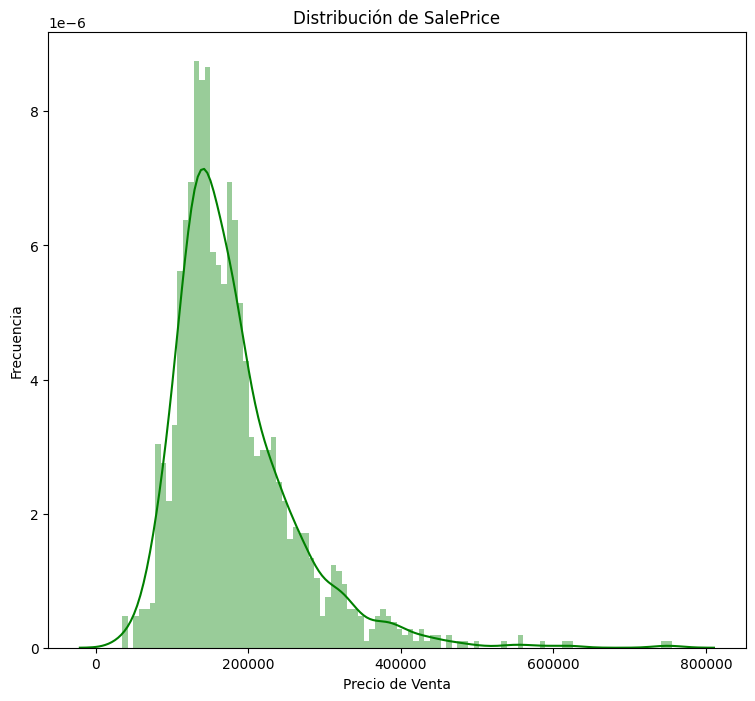

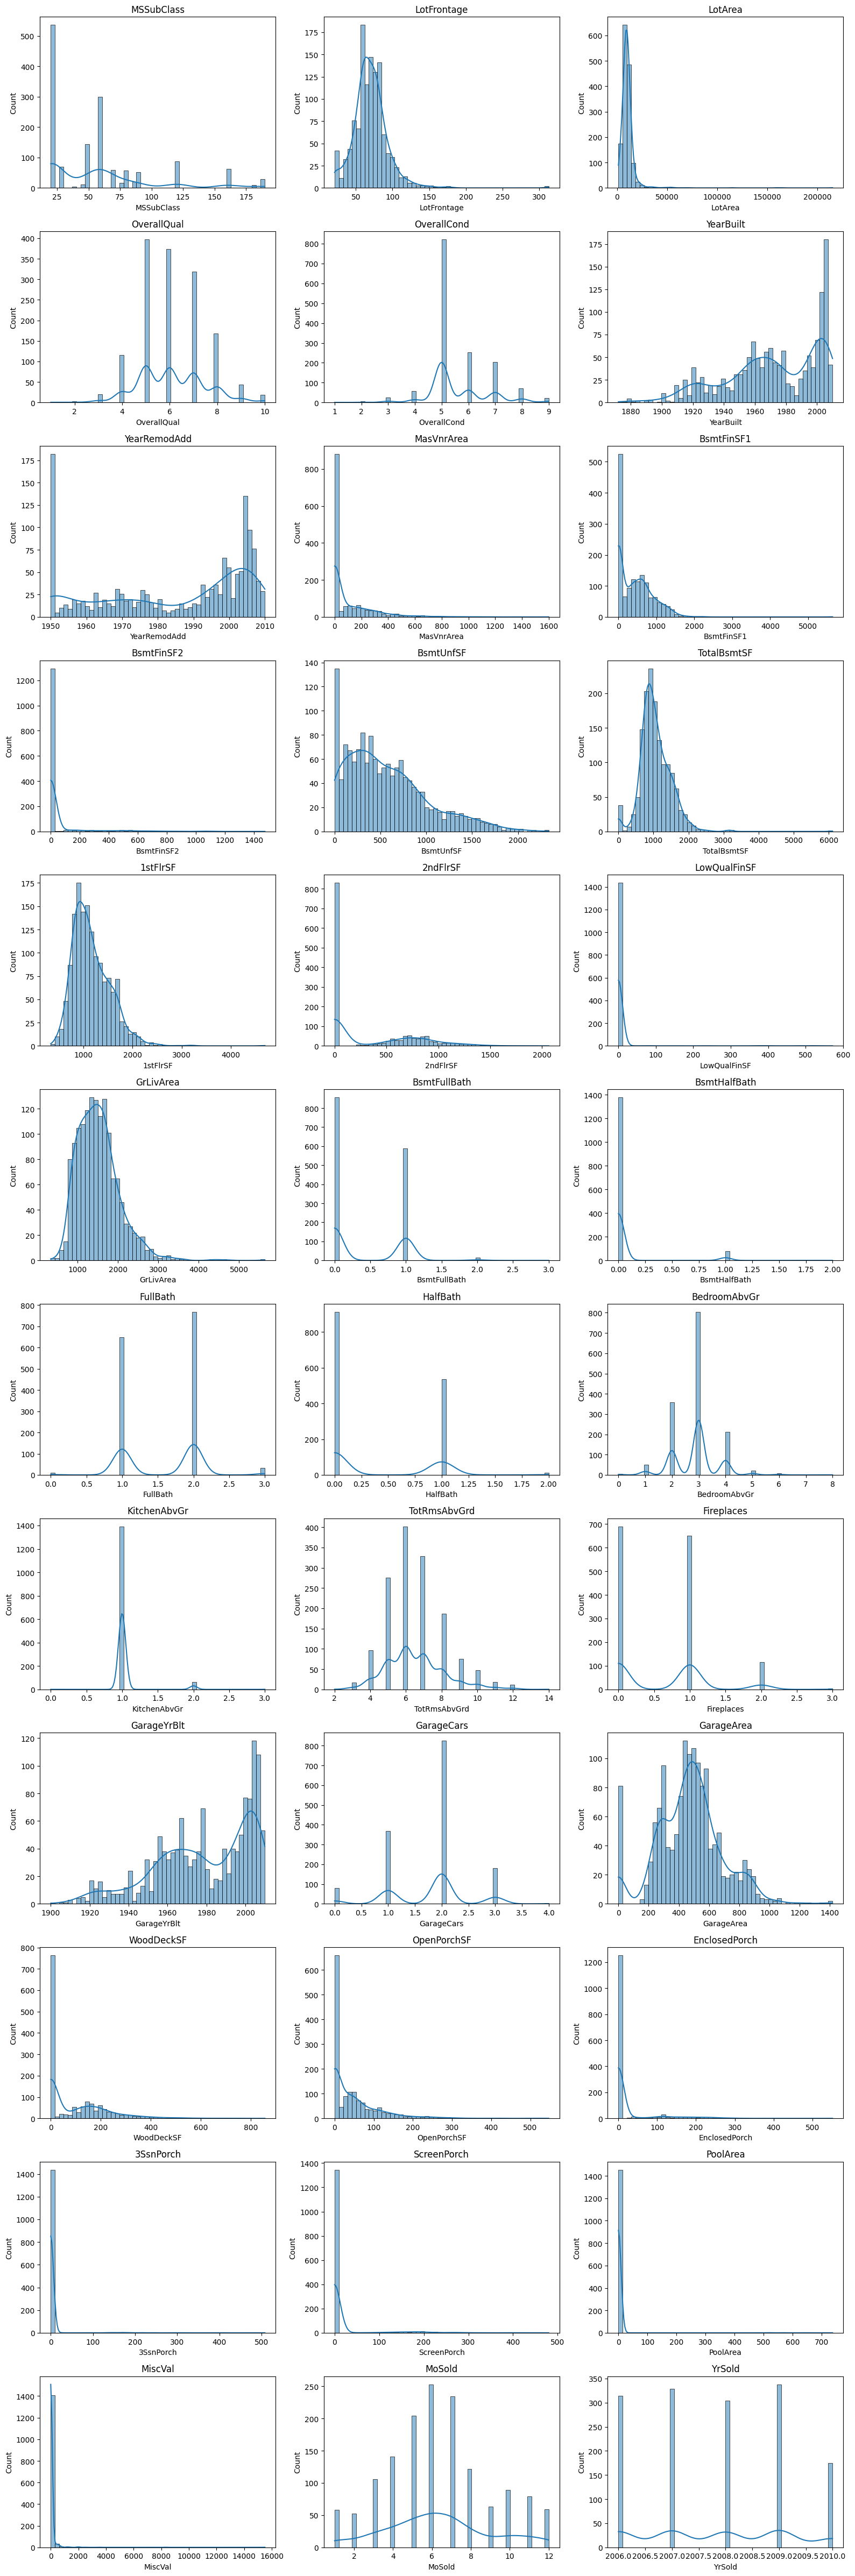

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


train_file_path = 'train.csv'  
dataset_df = pd.read_csv(train_file_path)


print("Forma del conjunto de datos de entrenamiento:", dataset_df.shape)

# Elimina la columna 'Id' 
dataset_df = dataset_df.drop('Id', axis=1)


print(dataset_df.head(3))

# Describe la distribución de 'SalePrice'
print(dataset_df['SalePrice'].describe())

# Visualiza la distribución de 'SalePrice'
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Distribución de SalePrice')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()


df_num = dataset_df.select_dtypes(include=['float64', 'int64'])
df_num.drop(['SalePrice'], axis=1, inplace=True)  
num_features = df_num.columns.tolist()
num_rows = len(num_features) // 3 + (1 if len(num_features) % 3 > 0 else 0)


plt.figure(figsize=(16, 4 * num_rows))
for i, feature in enumerate(num_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df_num[feature], bins=50, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


Distribución Asimétrica: La distribución de SalePrice es asimétrica a la derecha , lo que significa que hay una cola más larga en el extremo derecho de la distribución. Esto indica que la mayoría de las casas se venden a un precio inferior al máximo y que hay algunas casas que se venden a precios significativamente más altos, lo que estira la cola hacia la derecha.

Concentración de Datos: La mayor parte de los datos se concentra alrededor de lo que parece ser el rango de $100,000 a $200,000, lo que podría indicar un rango de precios común para la mayoría de las casas en el conjunto de datos.

Outliers: La cola larga a la derecha sugiere la presencia de valores atípicos  que son casas vendidas a precios mucho más altos que el promedio. Estos outliers pueden ser propiedades de lujo o tener características especiales que justifiquen su precio elevado.

Pico de Frecuencia: Hay un pico notable en la frecuencia justo después del inicio del histograma. Esto podría sugerir que hay una cantidad considerable de casas vendidas en un rango de precio particular que es más bajo que el promedio general, posiblemente casas más modestas o ubicadas en áreas menos costosas.


Distribución de SalePrice: La variable objetivo, SalePrice, muestra una distribución sesgada hacia la derecha. Esto indica que la mayoría de las casas se venden a precios por debajo del promedio, pero hay algunas casas que se venden a precios significativamente más altos.


Algunas características, como OverallQual y YearBuilt, tienen distribuciones que sugieren una relación más directa con el precio de venta. Casas con mejor calidad o más nuevas tienden a tener precios más altos.

Características como LotArea, y GrLivArea  muestran sesgo positivo, lo que significa que la mayoría de las casas tienen áreas más pequeñas, con unas pocas teniendo áreas excepcionalmente grandes.

Muchas características, como PoolArea y 3SsnPorch, están mayormente pobladas con ceros, indicando que muchas casas no tienen estas instalaciones.



Las características con distribuciones que indican una relación más clara con SalePrice podrían ser buenos predictores para el modelo de regresión.

La transformación de las características, como aplicar el logaritmo a SalePrice y a otras características sesgadas, podrían mejorar la normalidad de la distribución, lo que es beneficioso para modelos lineales.

La alta proporción de ceros en algunas características sugiere que podrían considerarse como características categóricas (presente/ausente)por consiguiente, podrían requerir un manejo especial.

c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marce\AppData\Local\Temp\ipykernel_7992\2767884705.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = kmeans.fit_predict(df_scaled)
C:\Users\marce\AppData\Local\Temp\ipykernel_7992\2767884705.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

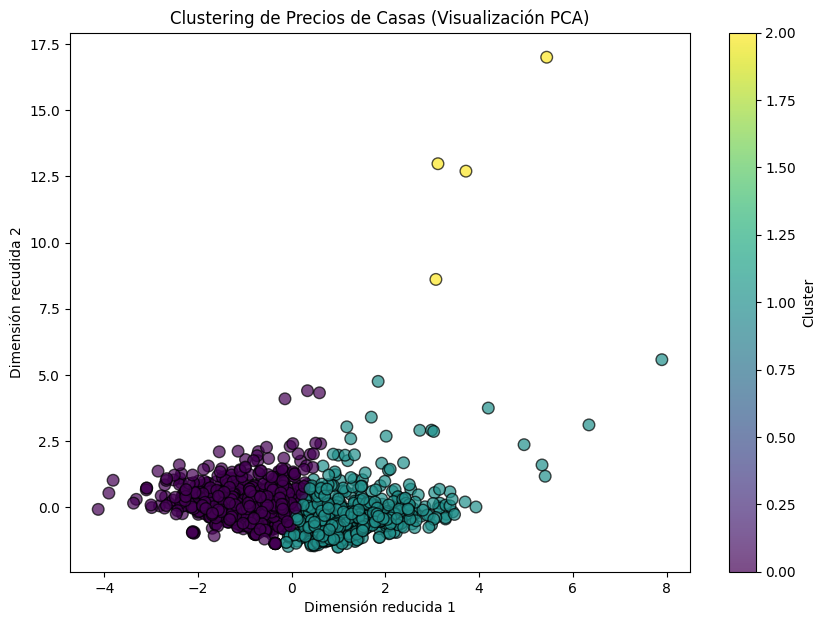

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = pd.read_csv('train.csv')

features = ['OverallQual', 'YearBuilt', 'LotArea', 'GrLivArea']
df_selected = df[features]


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)


kmeans = KMeans(n_clusters=3, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)


pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_selected['PCA1'] = df_pca[:, 0]
df_selected['PCA2'] = df_pca[:, 1]


plt.figure(figsize=(10, 7))
plt.scatter(df_selected['PCA1'], df_selected['PCA2'], c=df_selected['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=70, alpha=0.7)
plt.title('Clustering de Precios de Casas (Visualización PCA)')
plt.xlabel('Dimensión reducida 1')
plt.ylabel('Dimensión recudida 2')
plt.colorbar(label='Cluster')
plt.show()



La visualización muestra tres grupos claramente diferenciados en dos dimensiones, que son una representación reducida de las características originales seleccionadas (OverallQual, YearBuilt, LotArea, GrLivArea). 


Hay algunos puntos que están alejados de la mayoría de los otros puntos ,en la parte superior del gráfico. Estas podrían ser casas que tienen características únicas no comunes en el conjunto de datos general o valores extremos en algunas de las características originales.


El cluster que tiene los valores más bajos en las dos dimensiones principales parece es el más denso, indicando que hay más casas con características similares en ese grupo.

Los otros dos clusters  tienen menos puntos y están más dispersos, lo que sugiere una mayor variabilidad dentro de estas casas. Estos pueden representar segmentos de mercado más especializados o nichos, como casas de mayor calidad o más nuevas, o casas con terrenos más grandes.

Posibles preguntas análisis exploratorio:


Factores Influyentes:

¿Qué características (como la calidad general, el año de construcción, el área del lote y el área habitable) son los predictores más fuertes del precio de venta?
¿Cómo se correlacionan estas características con el precio de venta y cómo difieren estas correlaciones entre los clusters?

Distribución de SalePrice:

¿Es la distribución de SalePrice consistente a través del tiempo o hay diferencias significativas entre años?
¿Qué porcentaje de las casas se vende por encima o por debajo del precio de venta medio y mediano?

Outliers:

¿Qué propiedades específicas corresponden a los valores atípicos en el precio de venta?
¿Cuáles son las características únicas de las casas que se venden a precios significativamente más altos que el promedio?
Impacto del Año de Construcción:

¿Cómo afecta el año de construcción al precio de venta de una casa?
¿Las casas más nuevas se venden a precios más altos que las más antiguas?

Análisis Geográfico:

¿Existe una variación geográfica en el precio de venta de las casas?
¿Cómo se distribuyen los clusters geográficamente, si es que hay datos disponibles sobre la ubicación?

Efecto del Tamaño:

¿Cómo afecta el área del lote y el área habitable al precio de venta?
¿Hay un tamaño de lote o área habitable por encima o por debajo del cual los precios de venta tienden a aumentar o disminuir significativamente?
